# Market Sentiment Trading Strategy Backtest

## This strategy aims buy the SPY ETF and holding it overnight, based on market sentiment indicators. Market sentiment indicators could tell us when investors are bullish on the market, meaning they tend to buy more, or bearish and buying less. We will calculate 30-Day moving averages of the adjusted close prices of both SPY and VIX. When the price of SPY is greater than its 30-Day moving average, and the price of VIX is less than its 30-Day moving average, we will buy the SPY ETF and hold it overnight.

### Import Python Modules

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Data Preparation

In [2]:
# Import SPRD S&P 500 ETF Trust data from Yahoo Finance
spy_df = pd.read_csv("SPY-4.csv")
spy_df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2000-01-03,148.250000,148.250000,143.875000,145.437500,93.290207,8164300
1,2000-01-04,143.531250,144.062500,139.640625,139.750000,89.641953,8089800
2,2000-01-05,139.937500,141.531250,137.250000,140.000000,89.802315,12177900
3,2000-01-06,139.625000,141.500000,137.750000,137.750000,88.359085,6227200
4,2000-01-07,140.312500,145.750000,140.062500,145.750000,93.490631,8066500
...,...,...,...,...,...,...,...
6181,2024-07-30,546.260010,547.340027,538.520020,542.000000,542.000000,46853600
6182,2024-07-31,548.979980,553.500000,547.580017,550.809998,550.809998,65663400
6183,2024-08-01,552.570007,554.869995,539.429993,543.010010,543.010010,76428700
6184,2024-08-02,535.750000,536.989990,528.599976,532.900024,532.900024,82789100


In [3]:
# Import CBOE Volatility Index data from Yahoo Finance
vix_df = pd.read_csv("^VIX.csv")
vix_df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2000-01-03,24.360001,26.150000,23.980000,24.209999,24.209999,0.0
1,2000-01-04,24.940001,27.180000,24.799999,27.010000,27.010000,0.0
2,2000-01-05,27.980000,29.000000,25.850000,26.410000,26.410000,0.0
3,2000-01-06,26.680000,26.709999,24.700001,25.730000,25.730000,0.0
4,2000-01-07,25.139999,25.170000,21.719999,21.719999,21.719999,0.0
...,...,...,...,...,...,...,...
6411,2024-07-30,16.639999,18.320000,16.260000,17.690001,17.690001,0.0
6412,2024-07-31,16.660000,16.770000,15.710000,16.360001,16.360001,0.0
6413,2024-08-01,16.200001,19.480000,15.950000,18.590000,18.590000,0.0
6414,2024-08-02,20.520000,29.660000,20.010000,23.389999,23.389999,0.0


In [4]:
# Combine Data by date
combined_df = pd.merge(spy_df, vix_df, on="Date", suffixes=("_SPY","_VIX"))
combined_df

,Date,Open_SPY,High_SPY,Low_SPY,Close_SPY,Adj Close_SPY,Volume_SPY,Open_VIX,High_VIX,Low_VIX,Close_VIX,Adj Close_VIX,Volume_VIX
0,2000-01-03,148.250000,148.250000,143.875000,145.437500,93.290207,8164300,24.360001,26.150000,23.980000,24.209999,24.209999,0.0
1,2000-01-04,143.531250,144.062500,139.640625,139.750000,89.641953,8089800,24.940001,27.180000,24.799999,27.010000,27.010000,0.0
2,2000-01-05,139.937500,141.531250,137.250000,140.000000,89.802315,12177900,27.980000,29.000000,25.850000,26.410000,26.410000,0.0
3,2000-01-06,139.625000,141.500000,137.750000,137.750000,88.359085,6227200,26.680000,26.709999,24.700001,25.730000,25.730000,0.0
4,2000-01-07,140.312500,145.750000,140.062500,145.750000,93.490631,8066500,25.139999,25.170000,21.719999,21.719999,21.719999,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6181,2024-07-30,546.260010,547.340027,538.520020,542.000000,542.000000,46853600,16.639999,18.320000,16.260000,17.690001,17.690001,0.0
6182,2024-07-31,548.979980,553.500000,547.580017,550.809998,550.809998,65663400,16.660000,16.770000,15.710000,16.360001,16.360001,0.0
6183,2024-08-01,552.570007,554.869995,539.429993,543.010010,543.010010,76428700,16.200001,19.480000,15.950000,18.590000,18.590000,0.0
6184,2024-08-02,535.750000,536.989990,528.599976,532.900024,532.900024,82789100,20.520000,29.660000,20.010000,23.389999,23.389999,0.0


In [5]:
# Calculate moving averages
rolling_days = 30
combined_df["SPY Rolling 30-Day Average"] = combined_df["Adj Close_SPY"].rolling(rolling_days).mean()
combined_df["VIX Rolling 30-Day Average"] = combined_df["Adj Close_VIX"].rolling(rolling_days).mean()
combined_df.head(30)

,Date,Open_SPY,High_SPY,Low_SPY,Close_SPY,Adj Close_SPY,Volume_SPY,Open_VIX,High_VIX,Low_VIX,Close_VIX,Adj Close_VIX,Volume_VIX,SPY Rolling 30-Day Average,VIX Rolling 30-Day Average
0,2000-01-03,148.250000,148.250000,143.875000,145.43750,93.290207,8164300,24.360001,26.150000,23.980000,24.209999,24.209999,0.0,NaN,NaN
1,2000-01-04,143.531250,144.062500,139.640625,139.75000,89.641953,8089800,24.940001,27.180000,24.799999,27.010000,27.010000,0.0,NaN,NaN
2,2000-01-05,139.937500,141.531250,137.250000,140.00000,89.802315,12177900,27.980000,29.000000,25.850000,26.410000,26.410000,0.0,NaN,NaN
3,2000-01-06,139.625000,141.500000,137.750000,137.75000,88.359085,6227200,26.680000,26.709999,24.700001,25.730000,25.730000,0.0,NaN,NaN
4,2000-01-07,140.312500,145.750000,140.062500,145.75000,93.490631,8066500,25.139999,25.170000,21.719999,21.719999,21.719999,0.0,NaN,NaN
5,2000-01-10,146.250000,146.906250,145.031250,146.25000,93.811333,5741700,21.889999,22.490000,21.360001,21.709999,21.709999,0.0,NaN,NaN
6,2000-01-11,145.812500,146.093750,143.500000,144.50000,92.688812,7503700,21.980000,22.629999,21.690001,22.500000,22.500000,0.0,NaN,NaN
7,2000-01-12,144.593750,144.593750,142.875000,143.06250,91.766762,6907700,23.049999,23.490000,22.410000,22.840000,22.840000,0.0,NaN,NaN
8,2000-01-13,144.468750,145.750000,143.281250,145.00000,93.009544,5158300,22.730000,23.100000,21.320000,21.709999,21.709999,0.0,NaN,NaN
9,2000-01-14,146.531250,147.468750,145.968750,146.96875,94.272385,7437300,19.830000,20.150000,19.510000,19.660000,19.660000,0.0,NaN,NaN


In [6]:
# Drop NaN values
combined_df = combined_df.dropna()
combined_df.head(20)

,Date,Open_SPY,High_SPY,Low_SPY,Close_SPY,Adj Close_SPY,Volume_SPY,Open_VIX,High_VIX,Low_VIX,Close_VIX,Adj Close_VIX,Volume_VIX,SPY Rolling 30-Day Average,VIX Rolling 30-Day Average
29,2000-02-14,139.78125,139.78125,138.312500,139.500000,89.481613,8528800,24.670000,24.889999,24.270000,24.379999,24.379999,0.0,91.315064,23.099000
30,2000-02-15,139.25000,141.21875,137.796875,141.078125,90.493828,11078300,24.080000,24.750000,22.840000,22.920000,22.920000,0.0,91.221852,23.056000
31,2000-02-16,140.37500,140.93750,138.796875,139.000000,89.160866,8845400,23.200001,23.830000,22.740000,23.510000,23.510000,0.0,91.205815,22.939333
32,2000-02-17,140.43750,140.43750,138.218750,138.281250,88.699844,7584200,22.900000,23.480000,22.629999,23.170000,23.170000,0.0,91.169066,22.831333
33,2000-02-18,138.87500,138.87500,134.625000,135.312500,86.795547,9409200,23.370001,26.370001,23.370001,26.000000,26.000000,0.0,91.116948,22.840333
34,2000-02-22,135.18750,136.34375,133.531250,134.968750,86.575005,16415400,25.910000,28.120001,25.469999,25.860001,25.860001,0.0,90.886428,22.978333
35,2000-02-23,135.62500,137.46875,134.500000,136.562500,87.597359,12119000,25.200001,25.370001,23.559999,23.889999,23.889999,0.0,90.679295,23.051000
36,2000-02-24,136.68750,137.03125,133.093750,133.812500,85.833351,17375000,24.180000,25.940001,24.150000,24.379999,24.379999,0.0,90.450780,23.113667
37,2000-02-25,135.18750,136.71875,133.125000,133.328125,85.522652,10559900,24.129999,25.370001,23.580000,25.200001,25.200001,0.0,90.242643,23.192333
38,2000-02-28,133.37500,136.68750,132.718750,136.125000,87.316742,13397800,25.900000,26.190001,24.090000,24.680000,24.680000,0.0,90.052883,23.291333


### Caculate and Analyze Results

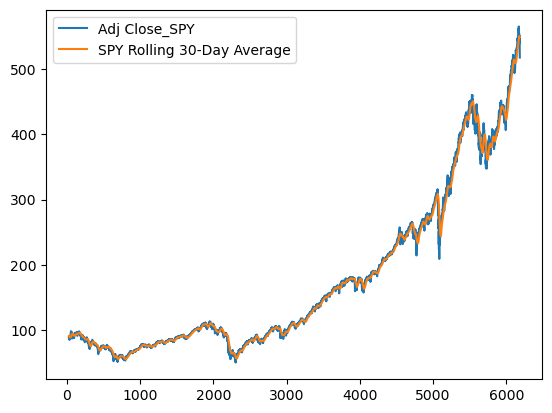

In [7]:
# Plot Moving Averages of SPY
SPY_MovingAvg_Plot = combined_df[["Adj Close_SPY", "SPY Rolling 30-Day Average"]].plot()

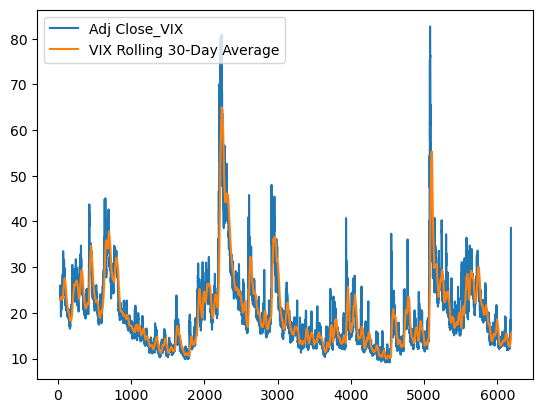

In [8]:
# Plot Moving Averages of VIX
VIX_MovingAvg_Plot = combined_df[["Adj Close_VIX", "VIX Rolling 30-Day Average"]].plot()

In [9]:
# Calculate daily excess returns implementing the trading strategy
returns = []

for i in range(len(combined_df)):
    if combined_df["Adj Close_SPY"].iloc[i] > combined_df["SPY Rolling 30-Day Average"].iloc[i] and combined_df["Adj Close_VIX"].iloc[i] < combined_df["VIX Rolling 30-Day Average"].iloc[i]:
        buy_price = combined_df["Close_SPY"].iloc[i]

        if i+1 < len(combined_df):
            sell_price = combined_df["Open_SPY"].iloc[i+1]
            returns.append((combined_df["Date"].iloc[i+1], (sell_price - buy_price) / buy_price))
    
returns_df = pd.DataFrame(returns, columns = ["Date", "Return"])
rf_rate = 0.03/252
returns_df["Excess Return"] = returns_df["Return"] - rf_rate
returns_df

,Date,Return,Excess Return
0,2000-03-06,-0.002214,-0.002333
1,2000-03-07,0.001789,0.001670
2,2000-03-10,-0.004880,-0.004999
3,2000-03-13,-0.024532,-0.024651
4,2000-03-16,0.012964,0.012845
...,...,...,...
3171,2024-07-05,0.000562,0.000443
3172,2024-07-08,0.001442,0.001323
3173,2024-07-09,0.001765,0.001646
3174,2024-07-10,0.002249,0.002130


In [10]:
# Calculate Average Daily Excess Return, Standard Deviation, and Annualized Sharpe Ratio
average_excess_return = returns_df["Excess Return"].mean()
sd_excess_return = returns_df["Excess Return"].std()
annualized_sharpe_ratio = np.sqrt(252)*average_excess_return/sd_excess_return
results = pd.DataFrame([[average_excess_return, sd_excess_return, annualized_sharpe_ratio]], 
                       columns=["Average Daily Excess Return", "Standard Deviation", "Annualized Sharpe Ratio"])
results                                              

,Average Daily Excess Return,Standard Deviation,Annualized Sharpe Ratio
0,0.000044,0.004884,0.143073


In [11]:
# Calculate Maximum Drawdown, Maximum Drawdown Duration
def calculateMaxDD(cumret):
    highwatermark=np.zeros(cumret.shape)
    drawdown=np.zeros(cumret.shape)
    drawdownduration=np.zeros(cumret.shape)
    for t in np.arange(1, len(cumret)):
        highwatermark[t]=np.maximum(highwatermark[t-1], cumret[t])
        drawdown[t]=(1+cumret[t])/(1+highwatermark[t])-1
        if drawdown[t]==0:
            drawdownduration[t]=0
        else:
            drawdownduration[t]=drawdownduration[t-1]+1
    maxDD = np.min(drawdown)
    maxDD_index = np.argmin(drawdown) 
    maxDDD = np.max(drawdownduration)
    return maxDD, maxDDD, maxDD_index

cumulative_returns = (1 + returns_df["Return"]).cumprod()-1
calculateMaxDD(cumulative_returns)

(-0.16868730870628368, 1609.0, 288)

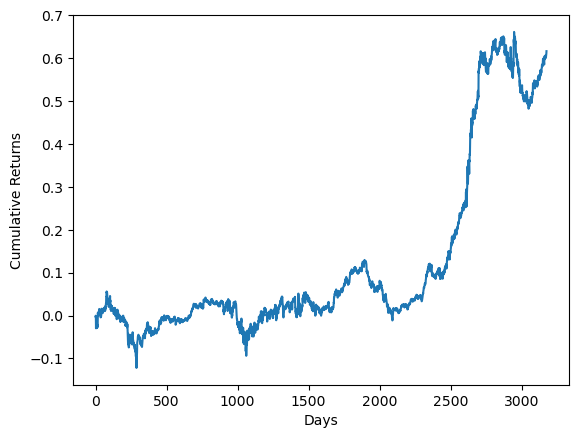

In [12]:
# Plot cumulative returns
plt.plot(cumulative_returns)
plt.xlabel("Days")
plt.ylabel("Cumulative Returns")
plt.show()